# Jegyzőkönyv 3 számolások

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schemdraw
from schemdraw import logic
from schemdraw.parsing import logicparse
from sympy import symbols, Not, Or, And
from sympy.logic.boolalg import simplify_logic

## 1. feladat: 2 bites komparátor

Áramkör teljesen megtervezve, bemutatni csak az egyenlőség részt kell.

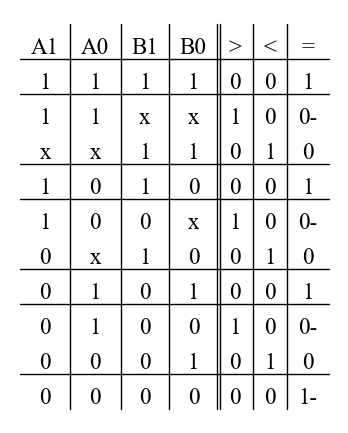

In [24]:
a1, a0, b1, b0 = symbols('a1,a0,b1,b0')

truth_table = """
A1|A0|B1|B0| >| <| =
---------------------
1 | 1| 1| 1| 0| 0| 1
---------------------
1 | 1| x| x| 1| 0| 0-
x | x| 1| 1| 0| 1| 0
---------------------
1 | 0| 1| 0| 0| 0| 1
---------------------
1 | 0| 0| x| 1| 0| 0-
0 | x| 1| 0| 0| 1| 0
---------------------
0 | 1| 0| 1| 0| 0| 1
---------------------
0 | 1| 0| 0| 1| 0| 0-
0 | 0| 0| 1| 0| 1| 0
---------------------
0 | 0| 0| 0| 0| 0| 1-
"""

logic.Table(truth_table, colfmt='c|c|c|c||c|c|c', fontsize=18, font="times new roman")

### `=` kimenet logikai egyszerűsítés

= minterm:
(a0 & a1 & b0 & b1) | (a0 & ~a1 & ~b1) | (a1 & b1 & ~a0 & ~b0) | (~a0 & ~a1 & ~b0 & ~b1)
Simplified:
(a0 | ~b0) & (a1 | ~b1) & (b1 | ~a1) & (b0 | ~a0 | ~b1)


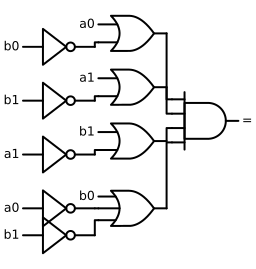

In [40]:
equivalence_equation = (a1 & a0 & b1 & b0) \
    | (~a1 & a0 & ~b1) \
    | (a1 & ~a0 & b1 & ~b0) \
    | (~a1 & ~a0 & ~b1 & ~b0)

print("= minterm:")
print(equivalence_equation)

simplified_equivalence = simplify_logic(equivalence_equation)
print("Simplified:")
print(simplified_equivalence)
logicparse(str(simplified_equivalence), outlabel="=")

### `>` kimenet logikai egyszerűsítés

> minterm:
(a1 & ~a0 & ~b1) | (a0 & a1 & ~(b0 & b1)) | (a0 & ~a1 & ~b0 & ~b1)
> simplified:
(a0 | a1) & (a0 | ~b1) & (a1 | ~b0) & (a1 | ~b1) & (~b0 | ~b1)


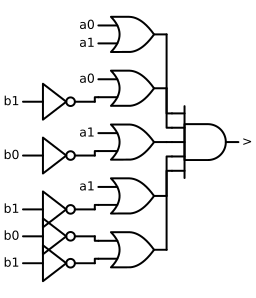

In [41]:
bigger_equation = (a1 & a0 & ~(b1 & b0)) \
    | (a1 & ~a0 & ~b1) \
    | (~a1 & a0 & ~b1 & ~b0)

print("> minterm:")
print(bigger_equation)

simplified_bigger = simplify_logic(bigger_equation)
print("> simplified:")
print(simplified_bigger)
logicparse(str(simplified_bigger), outlabel=">")

### `<` kimenet logikai egyszerűsítés

< minterm:
(b1 & ~a1 & ~b0) | (b0 & b1 & ~(a0 & a1)) | (b0 & ~a0 & ~a1 & ~b1)
< simplified:
(b0 | b1) & (b0 | ~a1) & (b1 | ~a0) & (b1 | ~a1) & (~a0 | ~a1)


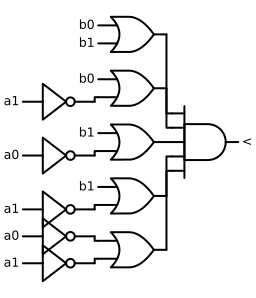

In [42]:
bigger_equation = (b1 & b0 & ~(a1 & a0)) \
    | (b1 & ~b0 & ~a1) \
    | (~b1 & b0 & ~a1 & ~a0)

print("< minterm:")
print(bigger_equation)

simplified_bigger = simplify_logic(bigger_equation)
print("< simplified:")
print(simplified_bigger)
logicparse(str(simplified_bigger), outlabel="<")

### Áramkör

[![Áramkör](./jegyzokonyv03/feladat1.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJwm8Gvjz7FCUMQDMAhgBsAzg2qROIbCn59VIEWKpS5CpEq5UwAsdqq6Z8xcqabTgzRYnWDUNgA9uGUXkE05HjkfCh8AILs3kxmBNxgSHhIoRFK0WBqePRgQaIpIABCUSBoIP60xGUhJXwFSglqOaJgxGpoeOCtYmpICGwJVCh4HS1qqiZdVHy9bACS6iX44L6LHZbQMwCyKoQjZti7WqKDG2zbNHALF1QuKKfnDmZ0aren3gcQWCoYiVM1IAAdACOXloKHoXzoQT+YRAAB5QdgupDIH4YXwAHxzBaYRorXE6DYUfoIPGiFAIclLCnHErUPrzRwqA7LUTYFnrGYNVkqUrtXmWOkzRlPS5NWiXTnE7ni7DlflyviDelsADuPPF9jJHnVWp5eqZSnVjw0bSWRt5qxx5rVVtGJVh9otKEdhEGjsmtpdfDAbpKw3AfudFx5QxGK2Dg0pVppOpK0f5sfGcaTfKWyedGDasIJipTWZU8thecz2dCAe9cfFYSoQhqlltdZr3F4CwtJjMgwL7ZKBaZBItmgVY0gSttmlwPpWk7jBpWevZx0bE5ZTMXca7aioBzWtu3h1lhwtTZDdeus9b56Z58j8fJIfFzoT1IrNplKwEHX5n+6Yj66vFZ4Wz4IDj0vTQz0lZcxhZPUaFbY9NHgqc8gQklBgDSlt1KLC-z-ccDy6ZMnQIkYiIPTsvUwoZex6GjSwoGiCR-Bif2-Ghd3VSs8wVcp6lJHkEAyK0hK3IViRFaYaPFUk1igIkGQWBAuhkyZ5K5ASZPxJYEAjcTFKZQho3FIzaRgDTtV4QYlis39hQWLMTBWRzCQsnkMFHK0PKVfTsUMgMTIDKU+m8UoaC6cKKmSf46lBFg1HCiAcgqECYuKGIQOIWsEgqeh8nCNIfDyLoYhCYhothSJoNoVs4IsarwuaD96uNEdTUYziROE2NRJTaNep6yiuP6swwwoIbgIoP0ZKDcc6I6TRlK3OaKBUswlo3HY5NkzadqZHawOmP0z00Q6ptrVtCFhM6rpQkBbt2+j7ujHtTIWN7nR0-EQ10pcuJ+76qFw29cLG4GvRskNY1sp9RFsnqIy9fr8UwxGuKWbzaJATGGMxgkNoYjawc9dUqA++6gr3Cm9j4XZOsWoi1BcwcmdKJlmdtK9RSB2b1XPXDk3BvmTVoTRhgbYXMjwbCqHF-MXm6gNiGEhiwEgHMC2V5b0ZGdXQj7PW+r8bQxrwFq7yOKNjb+q0RCty2UxDOXTelx3ZZNp3Xc+jozfvd2bdjPBW1NtDhr8IdoyDscdbKCPw+WyTkCWcU1fNdTpU0lY1ZzZPDeVeymTVh8s9HQVzIz7U7dtoNfMTsgmtEevXIrnlfatNv84khYtZ5Hvgr82IONbof+-feP29O3yuILXwvwxo8vQLfwvxnheuIDZesc3-iMJ913kzloH8LH7HDn5WffyBuKMA6DB4O4SK78qfL0vvu-BGSu-qkqwqWD4O+kA5Tvh0fIRRQRgFvvfQI2NIqgJZtjUomgfja0tMg9yAkLTihvj5bBm1cFk0pq1bGAkxa+jjKQhuZQyE3VhHWbejZWybyZPQ0m2M+JlC9lTOW4pD62iZD3OsfcGHCGEnQkeXCvZaAmjcMw4piATX4fOZwaNuDKNEHVG2gjRGtiLhLSauiFgGMQi8JRjQ4CdQNOYwxVilBAA)

## 2. feladat: Digitális kulcs lakat

Egy 4 bites kulcsot ellenőrzünk le, hogy a nálunk tárolt 4 bites kulccsal eggyezik-e.

wip..
https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJwm8Gvjz7FCUMQDMAhgBsAzg2qROIbCn59VIEWKpS5CpEq5UwAsdqq6Z8xcqabTgzRYnWDUNgA9uGUXkE05HjkfCh8ANLYXtxmBNxgSHhIoREo0SxqePRgQaIpIOHs3mgg-rTEpSEgYQVKALIqhHjqjc0uKNAIbA00YKKOtH1aolQdXd7YhBBYKjN4VPkAotE0kNMh2IkL1XwA8uHRKGCZKRDBtDsgAMpK3mDzpfRoFXh5l1dF-M1xOUHJ72k7kMyqZElUalcolw+iYzDDhjoQHobIZlGBiGoBui1C4rPpbFwUDUBkThCNXPjUdCUM0sTSEZYkW5bAkFs1VGyVAg1NskF0AO6lUZ4b5UXB8JSCh7ikC8FSQCVsQVymUqkqSoUqEoDDkeQU67VmGnNDVDY3gUQy02WhVa+WKwWaGVO9VKi1aqhMGjs12Cr0+z3e6oivXcOUDIQ7Sxu460uH0tAmmMJ-DcTSJ0P2NQZrNRzMOMy57H5zEYsTFjUmMujVah2ES8C+OuN0ThpsatutlLRx2YszaAYagfx5phHsW+sT8DVmOEKtqBwz3vThfZ2tD0RjhE5EZugdN4s70OHg9lwezmsmOfVVPW0ap0k3pOCx8Zx-nwVBybspqtUO9S1fwAlolAAST-TYF1-XVLE6Cg3W-CDoO5UNEMQ4DEI1NCSkQ88Ej4ElaxJDAeWqMQunwzUtweTBSNIiiEAIzciM3EixHothKP9PNuNo9jyLYcDiL7UIQ1gvlBKotiaLEqA4K6ITWMxTdZJgCTwN4tjeNU+S3S-ID2RQpQgA

## 3. feladat: Hővészjelző

Egy két bites csatornán érkező kódot kell dekódolni négy csatornára. Az a csatorna lesz hamis értékű, amelyik ki van választva

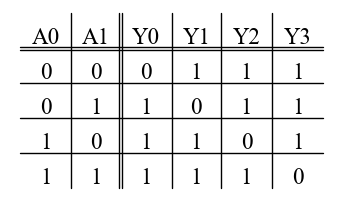

In [7]:
truth_table = """
A0 | A1 | Y0 | Y1 | Y2 | Y3
============================
 0 | 0  | 0  | 1  | 1  | 1
----------------------------
 0 | 1  | 1  | 0  | 1  | 1
----------------------------
 1 | 0  | 1  | 1  | 0  | 1
----------------------------
 1 | 1  | 1  | 1  | 1  | 0
"""

logic.Table(truth_table, colfmt='c|c||c|c|c|c', fontsize=18, font="times new roman")

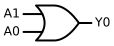

In [8]:
logicparse('A1 or A0', outlabel="Y0")

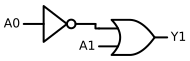

In [9]:
logicparse('not A0 or A1', outlabel="Y1")

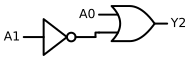

In [10]:
logicparse('A0 or not A1', outlabel="Y2")

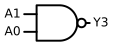

In [11]:
logicparse('A1 nand A0', outlabel="Y3")

### Szimulátor
[![áramkör](./jegyzokonyv02/feladat3.png)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJ7FcFPN14hihKOIBmAQwA2AZwbVIncWAHjR4qtPmKkygLIgUKGuBpmUCMWAviU0BGyMnL+Y9ePuqDpy9Mg2NhiVmJBYj6OzsYBmHyhxhh8kU4AHsYE4JSBrFn0lmYAmsrpAvFgSNi5KGCCBSCF7KWZmMQ5EGW0xkUobM182DQQVcN29YXYfdw0YnhULOR4+d0gAIJN3Gogc+CLywGrygDuQnxqgjxnhFTKFWfEZ3au5mY+4k4nYA-g16c-N2xPt9zqp1MoAJLgb7hGJmGE3RwUNgVKhgX4wr4DYL2d6A0GCVHfY5-Z6Y2FQPGXf5-MnEwlXekUk5UtHzYQCAmU4TYBAMwK8pnU3g3QJoQVUYX2TzEqnPFlEtiQ1lQ+6qrSIj6qInk24CsloQTPA04pBOO4qxLxWJJE1IpW-DkWx0I0145WO2V4TnM9lev485Ju74JHzSvGhiI6thAA)

### Alkatrészek
- 1 db OR kapu (3 felhasználás)
- 1 db NOT kapu (3 felhasználás)
- 1 db AND kapu (1 felhasználás)

# 4. feladat: 4 bemenetű prioritásdekódoló


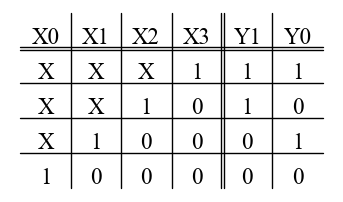

In [12]:
truth_table = """
X0 | X1 | X2 | X3 | Y1 | Y0
============================
 X | X  | X  | 1  | 1  | 1
----------------------------
 X | X  | 1  | 0  | 1  | 0
----------------------------
 X | 1  | 0  | 0  | 0  | 1
----------------------------
 1 | 0  | 0  | 0  | 0  | 0  
"""

logic.Table(truth_table, colfmt='c|c|c|c||c|c', fontsize=18, font="times new roman")

### Szimulátor
[![áramkör](./jegyzokonyv02/feladat4.png)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJ7FcFPN14hihKOIBmAQwA2AZwbVIbAB7caYvFRbk89GiBQGAGtlWGQWkNgh7ahkyk7gxYAS5FiqVafMVJlNUpLKgxiS30HEGN2LkIDN0F4z3EfWQUlc2JBKzddSKNo5S5WPkTwNxTvEF8MgLYAdyEy9x4ywm9G5pcqAUEwDqg2AFlrNEMEMWwEPhRJ8RRoBHNsDF7CemxSQ0IxA0KATUDrNfA7LfCwPD2og-ZR3iowDCmZ8BeFpbYwN773qfGzy8FioyyaA34-VcxD4ynB0NmeH6MKGP0RgjmAN68164jB3QG2mEmFhXTahgw6IppKayUxIGS5WUAEkeoZCmAUShCt4lhRvsFObMaL1CkZqrD+U1ufsRYYkQ5OrT9vMhRMvF1CeyEmIZUN4eAURC9ccwJByGAaAlLeAaOQEnwAFwASjYQA)

### Alkatrészek
- 1 db OR kapu (2 felhasználás)
- 1 db NOT kapu (1 felhasználás)
- 1 db AND kapu (1 felhasználás)

### Magyarázat

- A maximum prioritásnál nem kell kezelni a többi esetet, mivel "úgy is minden fel van kapcsolva"
- A minimum prioritásnál nem kell semmit bekötni, és így "semmi nem fog bezavarni"
- Az X2 bemenetet tudja zavarni az X1 bemenet, ezért egy ellenőrző áramkört rakunk X1 kimenetére (Y0), hogy ha az X2 bemenet is be van kapcsolva, akkor ne kapcsoljon ki az X1 kimenete (Y0)